# Visualization Libraries - Part1 
- Matplotlib,Procedural/Functional Approach,Object-Oriented Approach

## 01. Import Libraries
## 02. Import Data
## 03. Data Wrangling
## 04. Plot with pandas
## 05. Procedural Approach
## 06. Aggregate the Daily Bike Trips 
## 07. Object-Oriented Approach

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
#Check the version
import matplotlib
matplotlib.__version__

'3.10.1'

# 02. Import Data

In [3]:
#Import the data
df = pd.read_csv('CitiBikeW_data.csv', index_col = 0)

# 03. Data Wrangling

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
#Drop the merge column
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
#Check the dataframe
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,3255D3E3F33CDC45,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,casual,2022-03-18,13.9
1,17FA5604A37338F9,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-04,-1.9
2,7DEC9ADDB8D6BBE1,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
3,9D69F74EEF231A2E,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
4,C84AE4A9D78A6347,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-11,7.2


In [7]:
#Check the data type
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [8]:
#Check the dimentions
df.shape

(895485, 15)

In [9]:
#Convert the data column to type date
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [11]:
#Sort the dataframe by the date
df.sort_values(by='date', inplace=True)

In [12]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
76233,B42E6C17AF007611,classic_bike,2022-01-01 00:19:27,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,2022-01-01,11.6
71939,D5C9BBDBC66CEBF6,classic_bike,2022-01-01 13:48:18,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,2022-01-01,11.6
66649,F7D69E45F52F0ECA,electric_bike,2022-01-01 07:29:44,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,2022-01-01,11.6


# 04. Plot with pandas

In [13]:
#Set the date column to be the index of the dataframe
df_temp = df.set_index('date')

In [14]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,B42E6C17AF007611,classic_bike,2022-01-01 00:19:27,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6
2022-01-01,D5C9BBDBC66CEBF6,classic_bike,2022-01-01 13:48:18,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6
2022-01-01,F7D69E45F52F0ECA,electric_bike,2022-01-01 07:29:44,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6
2022-01-01,56E148D263A0B8F2,classic_bike,2022-01-01 01:03:38,2022-01-01 01:20:05,Columbus Drive,JC014,Hilltop,JC019,40.718355,-74.038914,40.731169,-74.057574,casual,11.6
2022-01-01,2F3A132B6C4F781D,electric_bike,2022-01-01 18:33:00,2022-01-01 18:51:41,Adams St & 2 St,HB407,Hoboken Terminal - River St & Hudson Pl,HB102,40.739814,-74.036904,40.736068,-74.029127,member,11.6


<Axes: xlabel='date'>

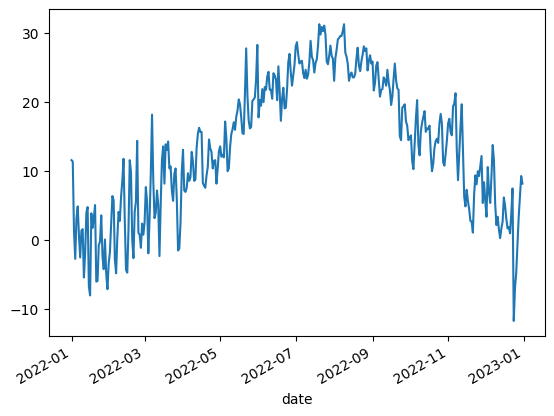

In [15]:
#Plot the average Temperatures
df_temp['avgTemp'].plot()

# 05. Procedural Approach

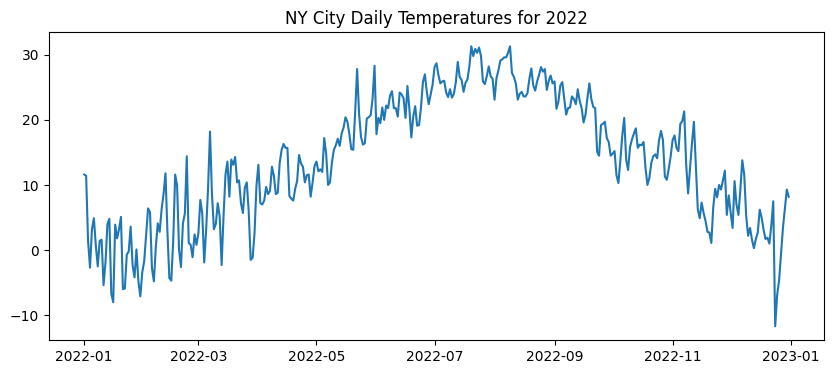

In [16]:
plt.figure(figsize=(10,4)) #Setting the figure size 
plt.title('NY City Daily Temperatures for 2022') #adding a title
plt.plot(df_temp['avgTemp']) #Plotting the average temperatures
plt.show()

# 06. Aggregate the Daily Bike Trips 

In [17]:
#Check the columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [18]:
#Groupby the *date* using the *trip_id* for each day to get the aggregated count of rides per day 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
#Check
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [20]:
#Rename the *trip_id* in the *df_group* to *daily_bike_rides*
df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)

In [21]:
df_group.head(3)

,date,daily_bike_rides
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832


In [22]:
#Merge the output with the main dataframe
#Merge the updated *df_group* into the main dataframe *df*
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)

In [23]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,daily_bike_rides,_merge
0,B42E6C17AF007611,classic_bike,2022-01-01 00:19:27,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,2022-01-01,11.6,592,both
1,D5C9BBDBC66CEBF6,classic_bike,2022-01-01 13:48:18,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,2022-01-01,11.6,592,both
2,F7D69E45F52F0ECA,electric_bike,2022-01-01 07:29:44,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,2022-01-01,11.6,592,both


In [24]:
#Check the changes 
print(df['_merge'].value_counts(dropna = False))

# Check the values in this merged dataframe matches the values in the df_group 
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) #First value check
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second value check 


_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 17)
Shape of January 2nd is (1248, 17)


In [25]:
#Set the date column to be the index of the dataframe **prepare for plotting**
df_temp = df.set_index('date')

In [26]:
print(df_temp.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'daily_bike_rides', '_merge'],
      dtype='object')


In [27]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_bike_rides,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,B42E6C17AF007611,classic_bike,2022-01-01 00:19:27,2022-01-01 00:25:03,Hoboken Terminal - River St & Hudson Pl,HB102,Adams St & 2 St,HB407,40.736068,-74.029127,40.739814,-74.036904,member,11.6,592,both
2022-01-01,D5C9BBDBC66CEBF6,classic_bike,2022-01-01 13:48:18,2022-01-01 13:57:13,14 St Ferry - 14 St & Shipyard Ln,HB202,Hoboken Terminal - River St & Hudson Pl,HB102,40.752961,-74.024353,40.736068,-74.029127,member,11.6,592,both
2022-01-01,F7D69E45F52F0ECA,electric_bike,2022-01-01 07:29:44,2022-01-02 00:34:32,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Brunswick & 6th,JC081,40.736982,-74.027781,40.726012,-74.050389,casual,11.6,592,both
2022-01-01,56E148D263A0B8F2,classic_bike,2022-01-01 01:03:38,2022-01-01 01:20:05,Columbus Drive,JC014,Hilltop,JC019,40.718355,-74.038914,40.731169,-74.057574,casual,11.6,592,both
2022-01-01,2F3A132B6C4F781D,electric_bike,2022-01-01 18:33:00,2022-01-01 18:51:41,Adams St & 2 St,HB407,Hoboken Terminal - River St & Hudson Pl,HB102,40.739814,-74.036904,40.736068,-74.029127,member,11.6,592,both


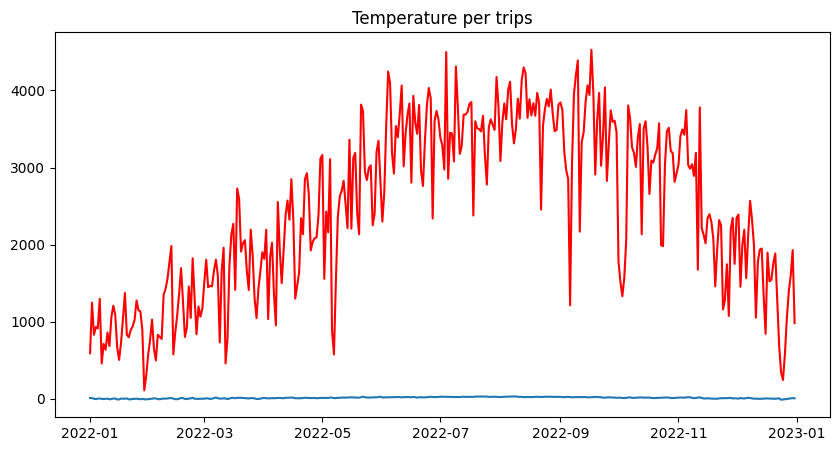

In [28]:
#Plot a line chart of bike trip counts and temperatures

plt.figure(figsize=(10,5)) #Setting the figure size
plt.title('Temperature per trips') #adding a title
plt.plot(df_temp['avgTemp']) #Plotting the average temperatures
plt.plot(df_temp['daily_bike_rides'], color = 'red') #Plotting the Daily Bike Trips
plt.show()

# 07. Object-Oriented Approach

#### Line chart with dual axes

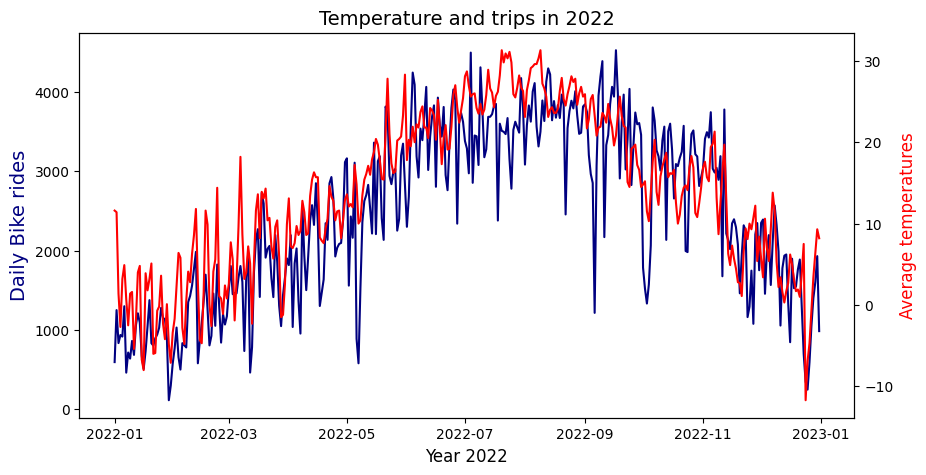

In [29]:
#Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10, 5))

#Make a plot of the bike rides
ax.plot(df_temp['daily_bike_rides'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 12) # set x-axis label
ax.set_ylabel("Daily Bike rides",color = "navy", fontsize = 14) # set y-axis label

#Create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

#Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp['avgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=12)
plt.title('Temperature and trips in 2022', fontsize = 14)
plt.show()

#### Line charts - Two Plots in the Same Figure

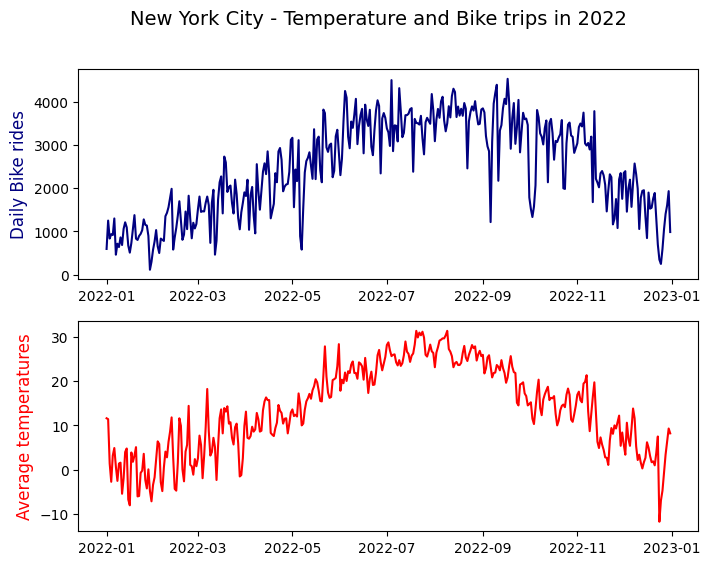

In [30]:
#Create figure and axis objects with subplots() and details **plt.style.use('ggplot')**
fig,ax = plt.subplots(2, figsize =(8, 6))

#Make a plot of the bike rides
ax[0].plot(df_temp['daily_bike_rides'],color = "navy")
ax[0].set_ylabel("Daily Bike rides",color = "navy", fontsize = 12) # set y-axis label

#Make a plot with the temperatures on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize = 12)
plt.suptitle('New York City - Temperature and Bike trips in 2022', fontsize = 14)

plt.show()

In [31]:
#Save the plot
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# Observations

+ The Object-Oriented approach allows building code by assigning specific properties and behaviors to individual objects.
+ In Matplotlib, the visual elements are the figures and the axes. Matplotlib allows plotting multiple visualizations in the same plot.
+ Plotting two variables with different scales can be achieved using dual axes.

-----------------

+ This means that the bike trips are plotted on the usual y-axis, while the temperatures are plotted on a different scale on the secondary y-axis.
+ In the code above, the new axes object is defined based on the existing one. When there are two axes objects, Matplotlib creates two charts within the same graph.
+ The twinx() function in Matplotlib is used to overlay the axes in the same plot.
+ A figure and axis objects are created with the subplots() function, and size parameters are set.
+ A plot for the bike rides is created, including setting the x-axis and y-axis labels.
+ A dual axis is initialized with a twin object for two different y-axes in the sample plot.
+ A plot is created for the temperatures on the y-axis using the second axis object, along with setting size parameters.
+ A title is given to the plot.
+ This results in a figure with two lines plotted together on a comparative scale.

-----------------

+ Creating two plots in the same figure is similar to the previous approach, with a few nuances.
+ The bike trip and temperature variables will each have their own plots, each with a line chart for the respective variable.

+ The steps to create two plots in the same figure"
+ Define the fig and ax objects.
+ Use the subplots() function with an additional argument to create two subplots.
+ Access the plots by indexing, such as ax[0] for the first plot and ax[1] for the second.
+ Set titles using the suptitle() function.
-----------------
+ In the code above, the figure and axis objects are created with the subplots() function, along with setting the size parameters.
+ A plot for the bike rides is created, setting the y-axis label and other parameters such as color and font size.
+ Then, a plot with the temperatures on the y-axis is made using the second axis object, setting its y-axis label and parameters.
+ A title is given to the plots.
+ This results in two plots in the same figure, each of which has its own x and y axes.